In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf


Функция активации нужна для того чтобы у нас была какая нибудь граница активации, чтобы  значение проходящее через сумматор всех весов и смещений не была слишком маленькой или слишком большой


In [61]:
from keras.datasets import fashion_mnist


(X_train,y_train_labels),(X_test,y_test_labels)=fashion_mnist.load_data()


In [62]:
class_names=['T-shirt/top','Trouser','Pullover',
             'Dress','Coat','Sandal','Shirt',
             'Sneaker','Bag','Ankle boot']

In [63]:
y_train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [64]:
from keras.utils import to_categorical

y_train=to_categorical(y_train_labels)#переводим в бинарное представление
y_test=to_categorical(y_test_labels) #короче как дамми переменные
#это делается чтобы все нейроны получали хоть какой-то сигнал


In [65]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

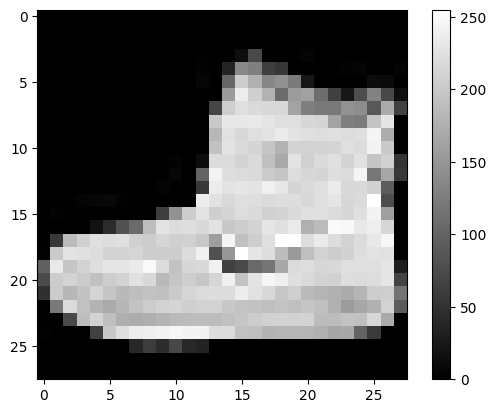

In [66]:
plt.figure()
plt.imshow(X_train[0],cmap='gray')
plt.colorbar()
plt.show()

In [67]:
X_train=X_train/255.0
X_test=X_test/255.0

Какие функции активации бывают?

1.Линейная функция
А(х)=х - пропорциональна входу


In [68]:
from keras.activations import linear

x=np.linspace(-10,10,100)
y=linear(x)
x[:5]

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919])

In [69]:
y[:5]

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919])

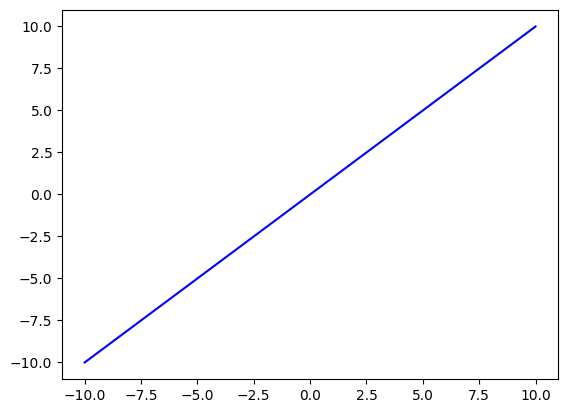

In [70]:
plt.plot(x,y,c='b')

In [71]:
#производная по x такой функции - всегда 1
#это плохо для градиентного спуска так как градиент всегда одинаков

In [72]:
#протестим проблемку

X=np.array([[1],[3],[2]])
y=np.array([[1,3,2]]).T

In [73]:
model=Sequential([
    Dense(1,input_shape=(1,),activation='linear',use_bias=False)#не используем смещение
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
#теперь будем следить за значениями градиентов

from keras.losses import MSE

for i in range(3):
    with tf.GradientTape() as tape:
        pred=model(X[i])
        print(pred.numpy(), 'but true is : ', y[i])

        loss_value=MSE(y[i],pred)
        print('loss : ',loss_value.numpy())

        grads=tape.gradient(loss_value,model.trainable_weights)
        print('Grad are : ', grads / loss_value)
        print('--------'*5)
 

#градиент везде одинаков даже не смотря на различие loss

[[0.9624616]] but true is :  [1]
loss :  [0.00140913]
Grad are :  tf.Tensor([[[-53.278763]]], shape=(1, 1, 1), dtype=float32)
----------------------------------------
[[2.887385]] but true is :  [3]
loss :  [0.01268216]
Grad are :  tf.Tensor([[[-53.27882]]], shape=(1, 1, 1), dtype=float32)
----------------------------------------
[[1.9249232]] but true is :  [2]
loss :  [0.00563653]
Grad are :  tf.Tensor([[[-53.278763]]], shape=(1, 1, 1), dtype=float32)
----------------------------------------


2 полносвязных линейных слоя это одна большая линейность которую нету смысла разделять на 2 слоя


2.Сигмоида

A(x)=1/(1+e^-x)

Нелинейная функция, идеально подходит для задач бинарной классификации 

У нее фиксированный диапазон значений [0,1].

[]

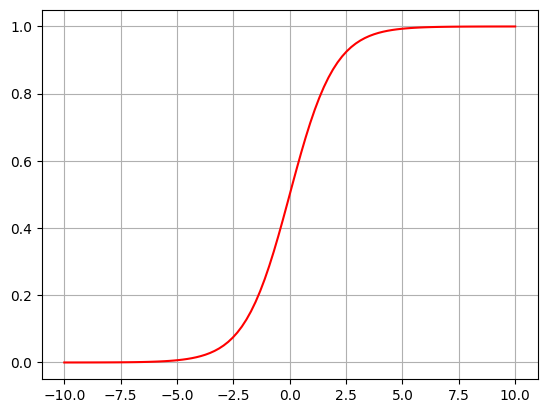

In [75]:
from keras.activations import sigmoid

x=np.linspace(-10,10,100)
y=sigmoid(x)

plt.plot(x,y,c='r')
plt.grid()
plt.plot()

In [76]:
def sigmoid_grad(x): #функция производной сигмоиды
    return sigmoid(x)*(1-sigmoid(x))

[]

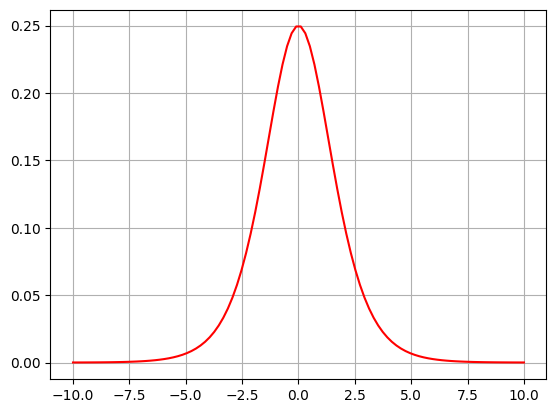

In [77]:

x=np.linspace(-10,10,100)
y=sigmoid_grad(x)

plt.plot(x,y,c='r')
plt.grid()
plt.plot()
#тут у нас проблема затухающих градиентов, то есть если сильно правое 
#значение или сильно левое то градиент будет практически нулевой и обучение будет медленным
#но эта проблема у нас возникает только если у нас много слоев

In [78]:
from keras.layers import Flatten

model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='sigmoid'),
    Dense(64,activation='sigmoid'),
    Dense(32,activation='sigmoid'),
    Dense(16,activation='sigmoid'),
    Dense(10,activation='sigmoid'),
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 10)                170       
                                                                 
Total params: 111514 (435.60 KB)
Trainable params: 111

In [79]:
from keras.losses import CategoricalCrossentropy
from keras.optimizers import SGD

optimizer=SGD(learning_rate=0.01)
loss_fn=CategoricalCrossentropy()

In [80]:
#подготовим тренировочный датасет
batch_size=64 #будет давать данные нашей нейронной сети по этим кускам

train_dataset=tf.data.Dataset.from_tensor_slices((X_train,y_train))
train_dataset=train_dataset.shuffle(buffer_size=X_train.shape[0]).batch(batch_size)
#что за пиздец



In [81]:
for X,y in train_dataset: #X - картинки
    print(X.shape) #y - целевые значения
    break


(64, 28, 28)


In [82]:
#блять короче здесь типо проблема затухающего градиента 
#но там столько кода что пиздец

#короче проблема в том что наши первые слои никак не обучаются 
#из-за практически нулевого градиента
#там к последним слоям градиент немного вырастает благодаря чему
#производиться обучения хотя бы на этих слоях, но это тоже не особо значимо


3. Тангенс

tanh(x)=(e^x-e^-x)/(e^x+e^-x)

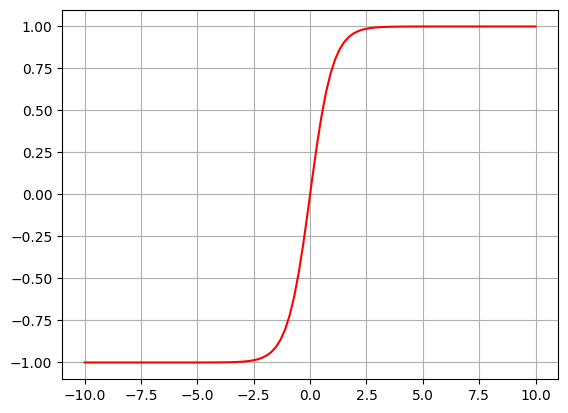

In [83]:
from keras.activations import tanh

x=np.linspace(-10,10,100)
y=tanh(x)

plt.plot(x,y,c='r')
plt.grid()
plt.show()

похож на сигмоиду только границы [-1,1]

Прозводная функции

ch(x)=1/((e^x+e^-x)/2)^2

In [84]:
def tanh_grad(x):
    return 1/(np.exp(x)+np.exp(-x)/2)**2

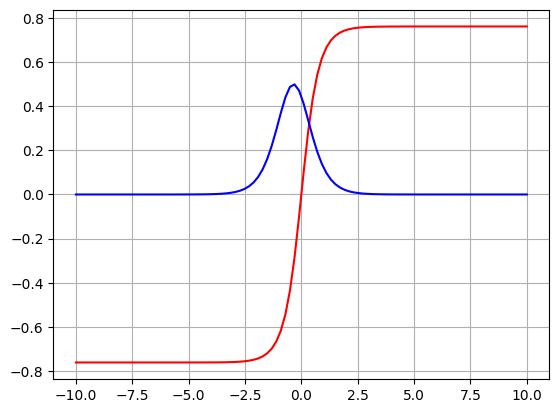

In [85]:
X=np.linspace(-10,10,100)
y=tanh(y)

grad_y=tanh_grad(x)

plt.plot(x,y,c='r')
plt.plot(x,grad_y,c='b')
plt.grid()


Проблема затухающего градиента не уходит

4.ReLU

A(x)=max(0,x)

Нелинейная функция, значит мы может создавать сразу несколько слоев
с этой функцией активации

Гораздо менее требовательна к вычислениям

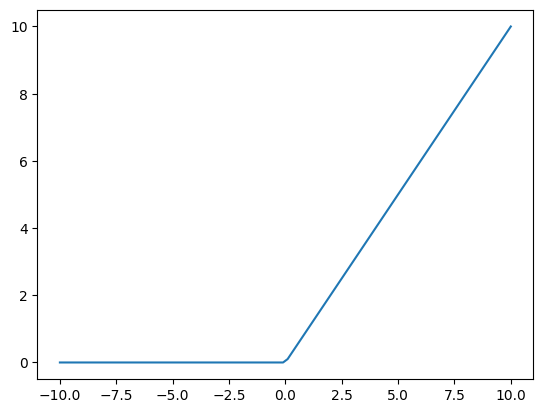

In [86]:
from keras.activations import relu


X=np.linspace(-10,10,100)
y=relu(x)

plt.plot(x,y)

In [87]:
#производная

def relu_grad(x):
    return np.where(x>=0,1,0)

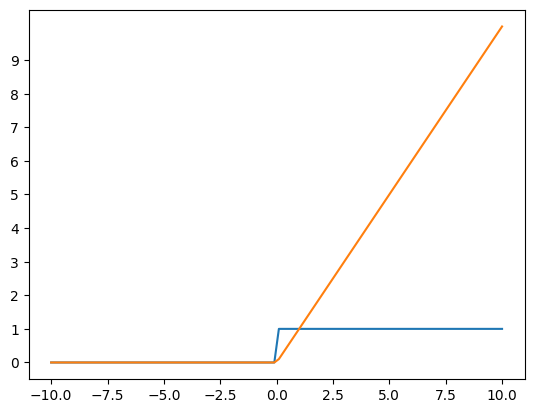

In [88]:
x=np.linspace(-10,10,100)
y=relu_grad(x)

plt.yticks(range(0,10))
plt.plot(x,y)
plt.plot(x,relu(x))

Проблемы затухающих градиентов здесь нет


Если имеем большую нейронную сеть с огромным количеством нейронов,
то использование сигмоиды или тагенса повлекут за собой активацию буквально всех нейронов.А хочется чтобы некоторые из них не были активированы чтобы сеть была легче.

ReLU может это сделать. К примеру, если у нас есть нейронная сеть со случайно инициализированными весами, То половина активаций равны 0 по ReLU(из-за того что они могут быть равны 0)

Но тут есть проблема, градиент на этой части равен 0, поэтому веса 
сети не будут изменяться во время обучения.

Но существуют модификации ReLU которые помогают это решить

In [89]:
X=np.array([[1],[3],[2]])
y=np.array([[1,3,2]]).T

In [90]:
model=Sequential([
    Dense(1,input_shape=(1,),activation='relu',use_bias=False)
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
model.get_weights() #Здесь он может быть как положительным так и отрицательным

[array([[-1.1580579]], dtype=float32)]

In [92]:
for i in range(3):
    with tf.GradientTape() as tape:
        pred=model(X[i])
        print(pred.numpy(), 'but true is : ', y[i])

        loss_value=MSE(y[i],pred)
        print('loss : ',loss_value.numpy())

        grads=tape.gradient(loss_value,model.trainable_weights)
        print('Grad are : ', grads / loss_value)
        print('--------'*5)
 
#градиенты занулились (из-за отрицательного веса)

[[0.]] but true is :  [1]
loss :  [1.]
Grad are :  tf.Tensor([[[-0.]]], shape=(1, 1, 1), dtype=float32)
----------------------------------------
[[0.]] but true is :  [3]
loss :  [9.]
Grad are :  tf.Tensor([[[-0.]]], shape=(1, 1, 1), dtype=float32)
----------------------------------------
[[0.]] but true is :  [2]
loss :  [4.]
Grad are :  tf.Tensor([[[-0.]]], shape=(1, 1, 1), dtype=float32)
----------------------------------------


5. Leaky ReLU 

A(x)=max(0.1x,x)

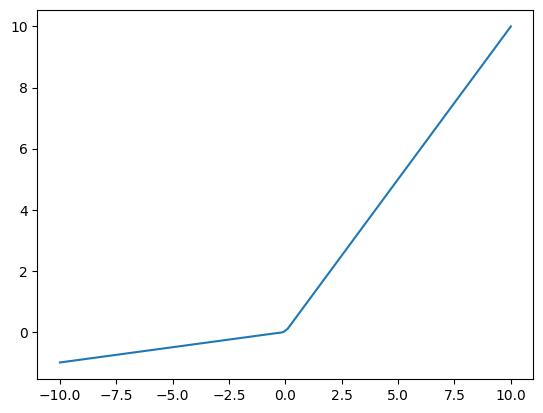

In [93]:
from keras.layers import LeakyReLU

def leaky_relu_function(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x) #условное выражение для масива в нумпай

x=np.linspace(-10,10,100)
y=leaky_relu_function(x,alpha=0.1)

plt.plot(x,y)

In [94]:
def leaky_relu_grad(x):
    return np.where(x>=0,1,0.1)

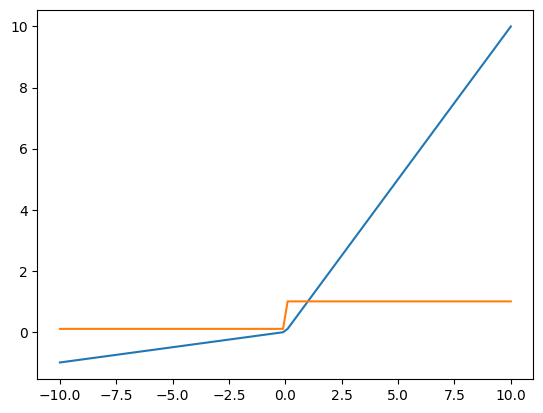

In [95]:
plt.plot(x,y)
y=leaky_relu_grad(x)
plt.plot(x,y)
#на отрицательной части градиенты все равное сть

6.ELU 

x if x>=0   

alpha(e^x-1) x< 0 

Суть та же что и в предыдущем, сделать чтобы не было нулевого градиента

А также чтобы не было нулевых весов


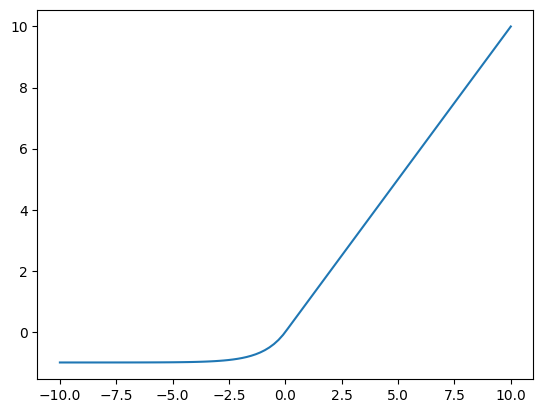

In [97]:
from keras.activations import elu

x=np.linspace(-10,10,100)
y=elu(x)

plt.plot(x,y)

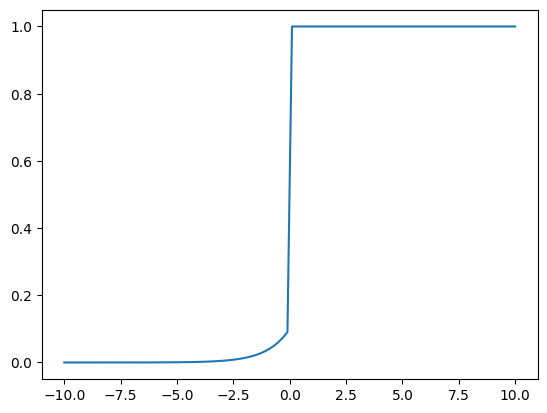

In [98]:
def elu_grad(x):
    return np.where(x>=0, 1 ,elu(x,alpha=0.1)+0.1)

plt.plot(x,elu_grad(x))

Кастомная функция активации